# **1. Looking at the data**

### 1.1 Importing Libraries

In [1]:
!pip install xgboost
!pip install imblearn

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 573.4 kB/s eta 0:02:54
   ---------------------------------------- 0.1/99.8 MB 726.2 kB/s eta 0:02:18
   ---------------------------------------- 0.2/99.8 MB 888.4 kB/s eta 0:01:53
   ---------------------------------------- 0.3/99.8 MB 1.0 MB/s eta 0:01:36
   ---------------------------------------- 0.5/99.8 MB 1.5 MB/s eta 0:01:05
   ---------------------------------------- 0.5/99.8 MB 1.4 MB/s eta 0:01:10
   ---------------------------------------- 1.0/99.8 MB 2.4 MB/s eta 0:00:41
   ---------------------------------------- 1.1/99.8 MB 2.4 MB/s eta 0:00:42
    --------------------------------------- 1.8/99.8 MB 3.7 MB/s eta 0:00:27
    --------------------------------------- 2.2/99.8 MB 3.9 MB/s eta 0:00:25
   - ---------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

### 1.2 Reading dataset

In [35]:
df = pd.read_csv("thyroidDF.csv")
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [36]:
df.shape

(9172, 31)

### 1.2 Features Exploration

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9172.0,7.355582e+01,1.183977e+03,1.000000e+00,3.700000e+01,5.500000e+01,6.800000e+01,6.552600e+04
TSH,8330.0,5.218403e+00,2.418401e+01,5.000000e-03,4.600000e-01,1.400000e+00,2.700000e+00,5.300000e+02
T3,6568.0,1.970629e+00,8.875788e-01,5.000000e-02,1.500000e+00,1.900000e+00,2.300000e+00,1.800000e+01
TT4,8730.0,1.087003e+02,3.752267e+01,2.000000e+00,8.700000e+01,1.040000e+02,1.260000e+02,6.000000e+02
T4U,8363.0,9.760557e-01,2.003604e-01,1.700000e-01,8.600000e-01,9.600000e-01,1.065000e+00,2.330000e+00
FTI,8370.0,1.136407e+02,4.155165e+01,1.400000e+00,9.300000e+01,1.090000e+02,1.280000e+02,8.810000e+02
TBG,349.0,2.987006e+01,2.108050e+01,1.000000e-01,2.100000e+01,2.600000e+01,3.100000e+01,2.000000e+02
patient_id,9172.0,8.529473e+08,7.581969e+06,8.408010e+08,8.504090e+08,8.510040e+08,8.607110e+08,8.701190e+08


In [38]:
df.describe(include='O').T

,count,unique,top,freq
sex,8865,2,F,6073
on_thyroxine,9172,2,f,7932
query_on_thyroxine,9172,2,f,9019
on_antithyroid_meds,9172,2,f,9056
sick,9172,2,f,8828
pregnant,9172,2,f,9065
thyroid_surgery,9172,2,f,9038
I131_treatment,9172,2,f,9003
query_hypothyroid,9172,2,f,8542
query_hyperthyroid,9172,2,f,8521


# **2. Data Cleaning & Handling**

## 2.1 Duplicates

In [39]:
df.duplicated().sum()

0

## 2.2 Feature Cleaning

* We will drop *referral_source* and *patient_id* because they are nominal data, not numerical data

In [40]:
df.drop(['referral_source','patient_id'],axis=1 ,inplace=True)

In [41]:
target_counts = df['target'].value_counts()
fig = px.bar(x=target_counts.index, y=target_counts.values)
fig.update_layout(xaxis_title='Target', yaxis_title='Count', title='Distribution of Target')

fig.show()

In [42]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [43]:
df = df[df['target'].isin(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'AK', 'C|I', 'H|K', 'GK', 'FK', 'GI', 'GKJ', 'D|R', '-'])]

In [44]:
df.shape

(7679, 29)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7679 entries, 0 to 9171
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7679 non-null   int64  
 1   sex                  7425 non-null   object 
 2   on_thyroxine         7679 non-null   object 
 3   query_on_thyroxine   7679 non-null   object 
 4   on_antithyroid_meds  7679 non-null   object 
 5   sick                 7679 non-null   object 
 6   pregnant             7679 non-null   object 
 7   thyroid_surgery      7679 non-null   object 
 8   I131_treatment       7679 non-null   object 
 9   query_hypothyroid    7679 non-null   object 
 10  query_hyperthyroid   7679 non-null   object 
 11  lithium              7679 non-null   object 
 12  goitre               7679 non-null   object 
 13  tumor                7679 non-null   object 
 14  hypopituitary        7679 non-null   object 
 15  psych                7679 non-null   object

* We will classify the cases into three classes: Hyperthyroid, Hypothyroid and Negative

In [46]:
mapping = {'-':"Negative",
           'A':'Hyperthyroid','AK':"Hyperthyroid",'B':"Hyperthyroid", 'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid", 'D|R':"Hyperthyroid",
           'E': "Hypothyroid", 'F': "Hypothyroid", 'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid", "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid',
          }
df['target'] = df['target'].map(mapping)


In [47]:
classes = df['target'].unique()
classes

array(['Negative', 'Hypothyroid', 'Hyperthyroid'], dtype=object)

In [48]:
target_dist = pd.DataFrame(df['target'].value_counts())
target_dist

,count
target,
Negative,6771
Hypothyroid,667
Hyperthyroid,241


In [52]:
target_dist = pd.DataFrame(df['target'].value_counts())
fig = px.pie(target_dist, labels=target_dist.index, values='count')
fig.update_traces(marker=dict(colors=["#BEE9E9","#6C7B8B", "#3A506B"]))
fig.show()

In [53]:
target_counts = df['target'].value_counts()
fig = px.bar(x=target_counts.index, y=target_counts.values)
fig.update_layout(xaxis_title='Target', yaxis_title='Count', title='Distribution of Target')
fig.show()

## 2.3 Outliers

* We notice that there are rows with age the reaches 6000
* since this is unrealistic We'll remove rows above 100

In [54]:
df = df[df['age'] < 100]

In [55]:
sorted(df['age'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 97]

## 2.2 Handling Missing Values

In [56]:
print(df.shape)
print(df.isna().sum())


(7675, 29)
age                       0
sex                     254
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     724
T3_measured               0
T3                     2208
TT4_measured              0
TT4                     354
T4U_measured              0
T4U                     681
FTI_measured              0
FTI                     674
TBG_measured              0
TBG                    7416
target                    0
dtype: int64


<Axes: >

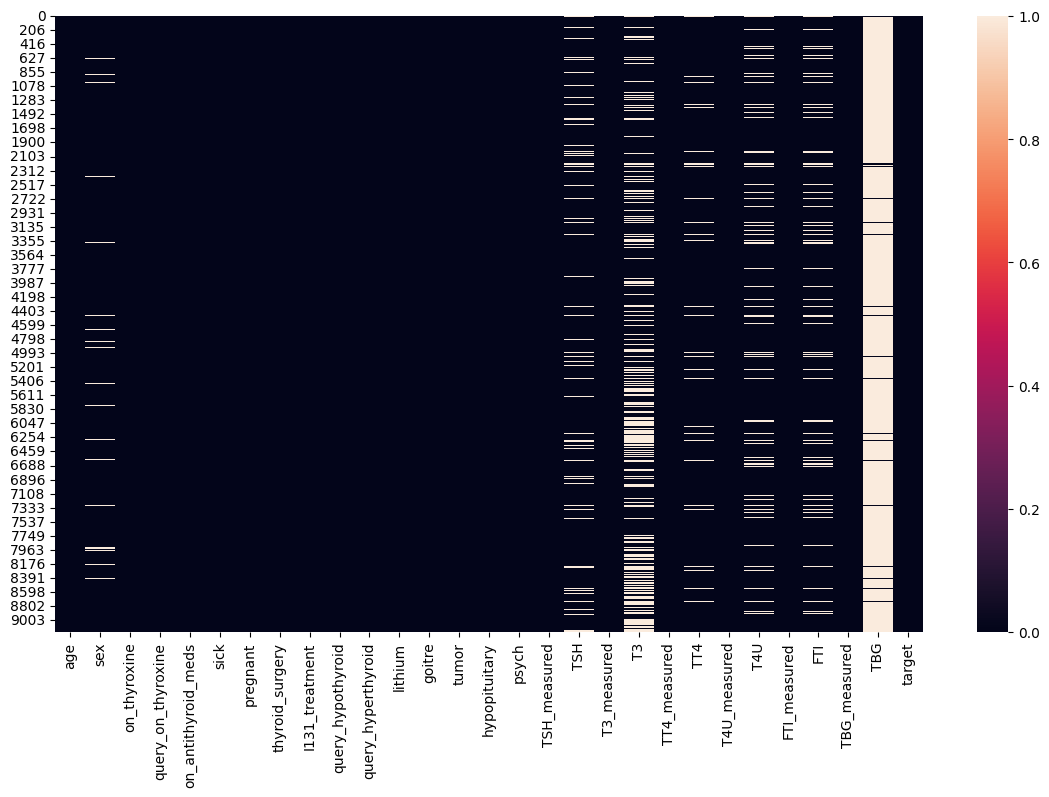

In [57]:
plt.subplots(figsize=(14, 8))
sns.heatmap(df.isnull())

In [58]:
null_cols = df.columns[df.isnull().any()]
nulls_df = df.loc[:, null_cols]
nulls_df = pd.DataFrame(nulls_df.isna().sum()/df.shape[0]*100)
nulls_df = nulls_df.rename(columns={0: 'Missing Values %'})
nulls_df

,Missing Values %
sex,3.309446
TSH,9.433225
T3,28.768730
TT4,4.612378
T4U,8.872964
FTI,8.781759
TBG,96.625407


* Since TBG almost all of it is nulll We'll drop this feature

In [59]:
df = df.drop('TBG', axis=1)

In [61]:
origin

,count
target,
Negative,6767
Hypothyroid,667
Hyperthyroid,241


In [62]:
after

,count
target,
Negative,4165
Hypothyroid,444
Hyperthyroid,169


In [65]:
origin = pd.DataFrame(df['target'].value_counts())
after = pd.DataFrame(df.dropna()['target'].value_counts())
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]],
                    subplot_titles=['Before', 'After'])
fig.add_trace(go.Pie(labels=origin.index, values=origin['count'],
                     marker=dict(colors=["#BEE9E9","#6C7B8B", '3A506B'])), row=1, col=1)
fig.add_trace(go.Pie(labels=after.index, values=after['count'],
                     marker=dict(colors=["#BEE9E9","#6C7B8B", '3A506B'])), row=1,col=2)

fig.show()

* We can see the percent of minor classes increased after removing rows

* We will drop all rows that had empty values, since they are not many

In [69]:
df = df.dropna()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4778 entries, 19 to 9141
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4778 non-null   int64  
 1   sex                  4778 non-null   object 
 2   on_thyroxine         4778 non-null   object 
 3   query_on_thyroxine   4778 non-null   object 
 4   on_antithyroid_meds  4778 non-null   object 
 5   sick                 4778 non-null   object 
 6   pregnant             4778 non-null   object 
 7   thyroid_surgery      4778 non-null   object 
 8   I131_treatment       4778 non-null   object 
 9   query_hypothyroid    4778 non-null   object 
 10  query_hyperthyroid   4778 non-null   object 
 11  lithium              4778 non-null   object 
 12  goitre               4778 non-null   object 
 13  tumor                4778 non-null   object 
 14  hypopituitary        4778 non-null   object 
 15  psych                4778 non-null   objec

In [71]:
print(df.isnull().sum())

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
target                 0
dtype: int64


# **3. EDA**

In [72]:
fig = px.violin(df,x='sex', y='age', color='target', points='all', height=700,
                color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F65366', 'Negative': '#3498db'})
fig.show()

In [73]:
cols = ['TSH', 'TT4', 'FTI', 'T4U', 'T3']
px.box(df, x=cols, color='target', height=900,
              color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F63366', 'Negative': '#3498db'}
)

# **4. Modeling**

## 4.1 Data Preparing

* Converting target column into numerical data

In [74]:
model_df = df
target_to_num = {
    'Negative': 0,
    'Hypothyroid':1,
    'Hyperthyroid':2,
}

# Make sure to not repeat the operation, to prevent make them nulls
if not df['target'].dtype == int or not set(df['target']).issubset({0, 1, 2}):
  model_df['target'] = model_df['target'].map(target_to_num)


In [75]:
model_df['target'].unique()

array([0, 2, 1], dtype=int64)

In [76]:
model_df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,target
19,36,F,f,f,f,f,f,f,f,t,...,t,2.4,t,90.0,t,1.06,t,85.0,f,0
21,40,F,f,f,f,f,f,f,f,f,...,t,2.3,t,104.0,t,1.08,t,96.0,f,0
22,40,F,f,f,f,f,f,f,f,f,...,t,2.1,t,88.0,t,0.84,t,105.0,f,0
23,77,F,f,f,f,f,f,f,f,f,...,t,2.4,t,107.0,t,1.13,t,95.0,f,0
27,51,F,f,f,f,f,f,f,f,f,...,t,2.1,t,93.0,t,0.87,t,106.0,f,0


* Converting columns into numerical data

In [77]:
columns_to_replace = ['on_thyroxine','query_on_thyroxine','on_antithyroid_meds',
                      'sick','pregnant','thyroid_surgery','I131_treatment',
                      'query_hypothyroid','query_hyperthyroid','lithium',
                      'goitre','tumor','hypopituitary','psych','TSH_measured',
                      'T3_measured','TT4_measured','T4U_measured',
                      'FTI_measured','TBG_measured'
]

for column in columns_to_replace:
  model_df[column] = model_df[column].replace({'t': 1, 'f': 0})

model_df['sex'] = model_df['sex'].replace({'M': 1, 'F': 0})


In [79]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4778 entries, 19 to 9141
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4778 non-null   int64  
 1   sex                  4778 non-null   int64  
 2   on_thyroxine         4778 non-null   int64  
 3   query_on_thyroxine   4778 non-null   int64  
 4   on_antithyroid_meds  4778 non-null   int64  
 5   sick                 4778 non-null   int64  
 6   pregnant             4778 non-null   int64  
 7   thyroid_surgery      4778 non-null   int64  
 8   I131_treatment       4778 non-null   int64  
 9   query_hypothyroid    4778 non-null   int64  
 10  query_hyperthyroid   4778 non-null   int64  
 11  lithium              4778 non-null   int64  
 12  goitre               4778 non-null   int64  
 13  tumor                4778 non-null   int64  
 14  hypopituitary        4778 non-null   int64  
 15  psych                4778 non-null   int64

* Split the data frame

In [80]:
x = model_df.drop(['target'], axis=1)
y = model_df['target']


In [81]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
19,36,0,0,0,0,0,0,0,0,1,...,1.50,1,2.4,1,90.0,1,1.06,1,85.0,0
21,40,0,0,0,0,0,0,0,0,0,...,1.20,1,2.3,1,104.0,1,1.08,1,96.0,0
22,40,0,0,0,0,0,0,0,0,0,...,5.90,1,2.1,1,88.0,1,0.84,1,105.0,0
23,77,0,0,0,0,0,0,0,0,0,...,0.05,1,2.4,1,107.0,1,1.13,1,95.0,0
27,51,0,0,0,0,0,0,0,0,0,...,0.05,1,2.1,1,93.0,1,0.87,1,106.0,0


In [82]:
y.head()

19    0
21    0
22    0
23    0
27    0
Name: target, dtype: int64

In [83]:
column_types = model_df.dtypes
print(column_types)

age                      int64
sex                      int64
on_thyroxine             int64
query_on_thyroxine       int64
on_antithyroid_meds      int64
sick                     int64
pregnant                 int64
thyroid_surgery          int64
I131_treatment           int64
query_hypothyroid        int64
query_hyperthyroid       int64
lithium                  int64
goitre                   int64
tumor                    int64
hypopituitary            int64
psych                    int64
TSH_measured             int64
TSH                    float64
T3_measured              int64
T3                     float64
TT4_measured             int64
TT4                    float64
T4U_measured             int64
T4U                    float64
FTI_measured             int64
FTI                    float64
TBG_measured             int64
target                   int64
dtype: object


* The all dataframe now numerical and ready to modeling

## 4.2 Data Spliting

In [84]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.3,
                                                   shuffle=True,
                                                   #stratify=y,
                                                   random_state=42
                                                    )

oversampler = SMOTE()
x_smote, y_smote = oversampler.fit_resample(x, y)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote,
                                                   y_smote,
                                                   test_size=0.3,
                                                   shuffle=True,
                                                   #stratify=y,
                                                   random_state=42
                                                    )

C:\Users\hsyem\AppData\Local\Temp\ipykernel_37620\2058826022.py:9: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



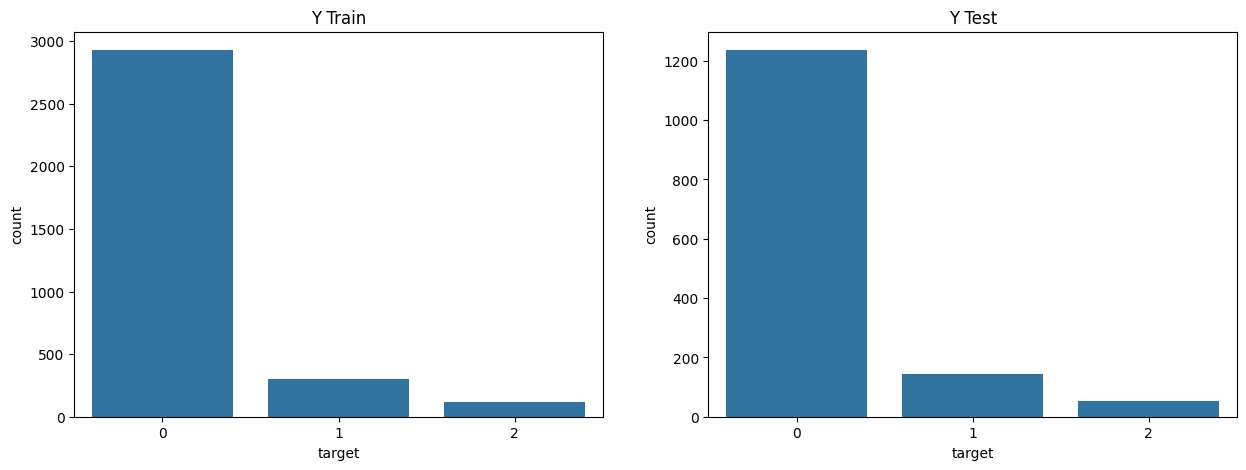

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x= y_train, ax=axs[0])
axs[0].set_title('Y Train')

sns.countplot(x= y_test, ax=axs[1])
axs[1].set_title('Y Test')

fig.show()

C:\Users\hsyem\AppData\Local\Temp\ipykernel_37620\3315042802.py:9: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



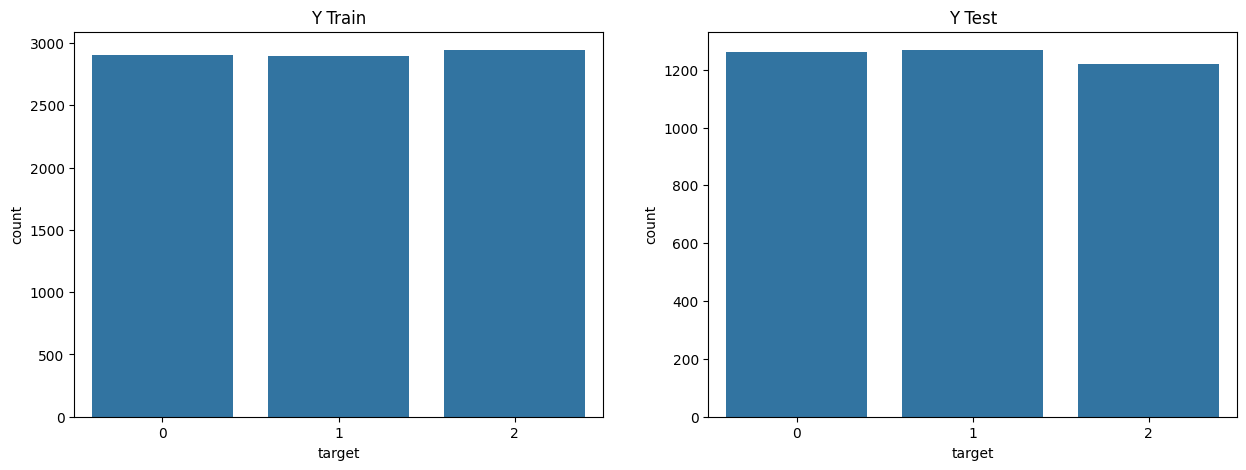

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x= y_train_smote, ax=axs[0])
axs[0].set_title('Y Train')

sns.countplot(x= y_test_smote, ax=axs[1])
axs[1].set_title('Y Test')

fig.show()

## 4.3 Feature Selection

In [87]:
from tqdm import tqdm
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, cohen_kappa_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from xgboost import plot_tree


### Select Percentile

In [88]:
# 1
ADA = AdaBoostClassifier()
# 2
ET = ExtraTreesClassifier()
# 3
RF = RandomForestClassifier()
# 4
GB = GradientBoostingClassifier()
# 5
SVM = SVC()
# 6
NB = GaussianNB()
# 7
KNN = KNeighborsClassifier()
# 8
XGB = XGBClassifier()

In [89]:
models = {'AdaBoost' : ADA,
          'ExtraTrees' : ET,
          'RandomForest' : RF,
          'GradientBoost' : GB,
          'SVM' : SVM,
          'Naive Bayes' : NB,
          'KNN' : KNN,
          'XGBClassifier' : XGB
          }

In [90]:
for key, item in models.items():
    print(key, item)

AdaBoost AdaBoostClassifier()
ExtraTrees ExtraTreesClassifier()
RandomForest RandomForestClassifier()
GradientBoost GradientBoostingClassifier()
SVM SVC()
Naive Bayes GaussianNB()
KNN KNeighborsClassifier()
XGBClassifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [91]:
feature_select = {}
selected_features_smote = SelectPercentile(chi2, percentile=25).fit(x_smote, y_smote)

for key, item in tqdm(models.items()):
        feature_select[key] = selected_features_smote.get_feature_names_out()

100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 7994.86it/s]


In [92]:
for key, item in feature_select.items():
    print(key, item)

AdaBoost ['age' 'sex' 'on_thyroxine' 'TSH' 'T3' 'TT4' 'FTI']
ExtraTrees ['age' 'sex' 'on_thyroxine' 'TSH' 'T3' 'TT4' 'FTI']
RandomForest ['age' 'sex' 'on_thyroxine' 'TSH' 'T3' 'TT4' 'FTI']
GradientBoost ['age' 'sex' 'on_thyroxine' 'TSH' 'T3' 'TT4' 'FTI']
SVM ['age' 'sex' 'on_thyroxine' 'TSH' 'T3' 'TT4' 'FTI']
Naive Bayes ['age' 'sex' 'on_thyroxine' 'TSH' 'T3' 'TT4' 'FTI']
KNN ['age' 'sex' 'on_thyroxine' 'TSH' 'T3' 'TT4' 'FTI']
XGBClassifier ['age' 'sex' 'on_thyroxine' 'TSH' 'T3' 'TT4' 'FTI']


## 4.4 Cross-Validation

In [93]:
def evaluatemodel(model,X, y):
    preds = cross_val_predict(model, X, y, cv=5, n_jobs=-1)
    print("Accuracy Score is ", accuracy_score(y, preds))
    print("Recall Score is ", recall_score(y, preds, average='macro'))
    print("Precision Score is ", precision_score(y, preds, average='macro'))
    print("Cohen Kappa Score is ", cohen_kappa_score(y, preds))
    print("F1 Score is ", f1_score(y, preds, average='macro'))
    print("Confusion Matrix is \n", confusion_matrix(y, preds))


In [94]:
x.shape

(4778, 27)

In [95]:
x_smote.shape

(12495, 27)

In [100]:
feature_list  = selected_features_smote.get_feature_names_out()
X_fs = x_smote[feature_list]
X_fs

,age,sex,on_thyroxine,TSH,T3,TT4,FTI
0,36,0,0,1.500000,2.400000,90.000000,85.000000
1,40,0,0,1.200000,2.300000,104.000000,96.000000
2,40,0,0,5.900000,2.100000,88.000000,105.000000
3,77,0,0,0.050000,2.400000,107.000000,95.000000
4,51,0,0,0.050000,2.100000,93.000000,106.000000
...,...,...,...,...,...,...,...
12490,38,0,0,0.236132,4.125188,249.025476,215.923572
12491,37,0,0,0.069150,3.929995,153.510014,175.959943
12492,62,0,0,0.034930,3.780837,117.508748,101.644614
12493,35,0,0,0.220084,1.367990,158.407939,181.719595


In [97]:
for key, item in models.items():
    print(f"{key} Evaluation: \n")
    evaluatemodel(model=item, X=X_fs, y=y_smote)
    print("\n-------------------------------")

AdaBoost Evaluation: 

Accuracy Score is  0.9629451780712285
Recall Score is  0.9629451780712285
Precision Score is  0.9641016440498921
Cohen Kappa Score is  0.9444177671068428
F1 Score is  0.9629899145000153
Confusion Matrix is 
 [[4054   33   78]
 [  32 4133    0]
 [ 320    0 3845]]

-------------------------------
ExtraTrees Evaluation: 

Accuracy Score is  0.9921568627450981
Recall Score is  0.9921568627450981
Precision Score is  0.9921896681596887
Cohen Kappa Score is  0.9882352941176471
F1 Score is  0.9921414819995841
Confusion Matrix is 
 [[4083   34   48]
 [   8 4157    0]
 [   8    0 4157]]

-------------------------------
RandomForest Evaluation: 

Accuracy Score is  0.9939975990396158
Recall Score is  0.9939975990396159
Precision Score is  0.9940184073731547
Cohen Kappa Score is  0.9909963985594238
F1 Score is  0.9939900593085577
Confusion Matrix is 
 [[4103   18   44]
 [   2 4163    0]
 [  11    0 4154]]

-------------------------------
GradientBoost Evaluation: 

Accuracy 

## 4.5 Models & Hyperparameter Optimization

* We will choose RandomForest due to its high scores among other models

In [102]:
feature_list  = selected_features_smote.get_feature_names_out()
X_fs = X_train_smote[feature_list]
X_fs

,age,sex,on_thyroxine,TSH,T3,TT4,FTI
11535,34,0,0,26.719890,4.403147,272.674778,222.157365
10934,59,0,0,0.155741,3.922941,251.508235,228.147060
7717,39,0,0,12.000000,2.193800,81.938001,72.123998
8740,72,0,0,0.034172,2.809781,193.940130,217.000000
1543,78,0,0,0.050000,2.000000,114.000000,134.000000
...,...,...,...,...,...,...,...
11964,41,0,0,0.112641,3.513685,157.264112,175.867944
5191,32,0,0,7.539802,2.456908,92.585528,92.845393
5390,68,1,0,82.439180,0.533913,26.152186,30.134808
860,61,1,0,0.150000,2.200000,121.000000,105.000000


In [103]:
RF.fit(X_fs, y_train_smote)

RandomForestClassifier()

In [105]:
preds = RF.predict(X_test_smote[feature_list])
print("Accuracy Score is ", accuracy_score(y_test_smote, preds))
print("Recall Score is ", recall_score(y_test_smote, preds, average='macro'))
print("Precision Score is ", precision_score(y_test_smote, preds, average='macro'))
print("Cohen Kappa Score is ", cohen_kappa_score(y_test_smote, preds))
print("F1 Score is ", f1_score(y_test_smote, preds, average='macro'))
print("\nConfusion Matrix is \n", confusion_matrix(y_test_smote, preds))


Accuracy Score is  0.9943985062683383
Recall Score is  0.9944359944359945
Precision Score is  0.99437357315573
Cohen Kappa Score is  0.9915970790379841
F1 Score is  0.9943736571452083

Confusion Matrix is 
 [[1240    5   15]
 [   0 1268    0]
 [   1    0 1220]]


## 4.6 Evaluation

In [106]:
from sklearn.metrics import classification_report

fs = selected_features_smote.get_feature_names_out()
preds = RF.predict(X_test_smote[fs])
print('RadfomForest model Report:\n')
print(classification_report(y_test_smote, preds))
print('-'*80)

RadfomForest model Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1260
           1       1.00      1.00      1.00      1268
           2       0.99      1.00      0.99      1221

    accuracy                           0.99      3749
   macro avg       0.99      0.99      0.99      3749
weighted avg       0.99      0.99      0.99      3749

--------------------------------------------------------------------------------


In [107]:
from sklearn.metrics import confusion_matrix

predictions = [preds]
con_matrices = []

for i in range(len(predictions)):
  con_matrices.append(confusion_matrix(y_test_smote, predictions[i]))

* Plot

In [108]:
from mlxtend.plotting import plot_confusion_matrix

title = 'RandomForest Model'

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=con_matrices[0],
                                show_absolute=True, show_normed=True, figsize=(8, 8))

# Set the title
ax.set_title(title)

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'mlxtend'

## 4.7 Save models

In [109]:
import pickle

In [110]:
# Save
with open('Thyroid.pkl', 'wb') as model_file:
    pickle.dump(RF, model_file)


In [111]:
import pickle
with open('Thyroid.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)


In [112]:
# Predict loaded
load_pred = loaded_model.predict(X_test_smote[fs])
load_pred

array([0, 2, 1, ..., 0, 0, 2], dtype=int64)

In [113]:
# Evaluate
accuracy = accuracy_score(y_test_smote, load_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9943985062683383


In [114]:
testing_data = X_test.copy()
testing_data = testing_data[fs]
testing_data["Target"] = y_test
testing_data

,age,sex,on_thyroxine,TSH,T3,TT4,FTI,Target
79,27,0,0,90.00,0.4,7.5,7.5,1
1006,62,0,0,31.00,2.0,65.0,65.0,1
5910,47,0,0,0.38,3.4,144.0,114.0,0
3991,65,1,0,3.10,2.7,131.0,126.0,0
8056,57,0,0,0.07,1.6,75.0,69.0,0
...,...,...,...,...,...,...,...,...
7558,81,1,0,1.10,1.3,112.0,140.0,0
918,40,0,0,0.15,1.3,105.0,119.0,0
3938,94,1,0,1.90,1.3,119.0,114.0,0
8920,62,0,1,0.94,1.8,83.0,101.0,0


In [115]:
testing_data.to_csv("Thyroid Testing Data.csv")

In [116]:
with open("THRclasses.txt", "w") as f :
    f.write(str(classes))
    f.close()

In [117]:
with open("THRfeatures.txt", "w") as f :
    f.write(str(fs))
    f.close()